# Factors Driving US IG Corp Bond A Index

Interest rates globally have been in a multi-decade downtrend since the last spike in inflation back in the early 1980s. As the world economies are working to overcome the Global COVID-19 Crisis (GCC), investors should observe a slow and steady road to normality somewhere in 2021 if everything goes as planned and the second wave is milder. 

Investors should be prepared to observe a continued uptrend in positive economic data releases over the next 12 to 24 months, which ultimately may drive bond yields higher. In this blog, I attended to leverage a simple multivariate linear regression to confirm the macro factors that are driving the US investment-grade corporate bond yield A-rated Index from S&P. I used the fed fund rate, the 10-year yield, the leading, coincident, and lagging economic indicator indices from the Conference Board as independent variables. 

In [433]:
import pandas as pd
import numpy as np

import datetime as dt

from datetime import datetime
import seaborn as sns

import statsmodels.formula.api as smf  
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection

import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [434]:
import PyDSWS as PyDSWS

In [435]:
ds = PyDSWS.Datastream(username='X', password='X')
ds;

In [436]:
df = ds.get_data(tickers='SPUIG1A(RY),FRFEDFW,TRUS10T,USCYLEADQ,USCOININ,USLAGGIN',
                  start="-26Y",end="0", freq="M")
df.columns= ['usAratedindex','fedfund','us10y','leadingindex','coincidentindex','laggingindex']

In [437]:
df

,usAratedindex,fedfund,us10y,leadingindex,coincidentindex,laggingindex
Date,,,,,,
1994-07-16,7.34444,4.30,7.243,77.5,70.2,61.6
1994-08-16,7.30615,4.35,7.175,78.1,70.6,61.8
1994-09-16,7.54593,4.70,7.479,78.6,70.8,62.1
1994-10-16,7.69639,4.62,7.604,79.1,71.1,62.2
1994-11-16,8.14902,5.22,8.008,79.3,71.4,62.6
...,...,...,...,...,...,...
2020-03-16,2.84388,1.09,0.996,103.4,105.2,111.6
2020-04-16,2.18418,0.05,0.656,97.1,94.3,113.5
2020-05-16,2.02222,0.05,0.640,99.8,95.3,111.4


In [438]:
df['leiindex'] = df['leadingindex'].shift(2)
df['coinindex'] = df['coincidentindex'].shift(2)
df['lagindex'] = df['laggingindex'].shift(2)

In [439]:
df = df[['usAratedindex','fedfund','us10y','leiindex','coinindex','lagindex']]

### Correlation Table:

In [440]:
df.corr().round(2)

,usAratedindex,fedfund,us10y,leiindex,coinindex,lagindex
usAratedindex,1.00,0.84,0.91,-0.43,-0.73,-0.77
fedfund,0.84,1.00,0.85,-0.09,-0.58,-0.64
us10y,0.91,0.85,1.00,-0.45,-0.83,-0.87
leiindex,-0.43,-0.09,-0.45,1.00,0.81,0.71
coinindex,-0.73,-0.58,-0.83,0.81,1.00,0.95
lagindex,-0.77,-0.64,-0.87,0.71,0.95,1.00


usAratedindex = US IG Corp Bond A Yield Index

The highest correlated macro factors with the usAratedindex are the US 10-year yield and the fed fund rate, which was expected since investment-grade bonds trade mainly based on macro than company-specific drivers. An interesting finding is the strong negative correlation between economic activity indices and usAratedindex. It may be due to several reasons such as central bank interventions, money printing, artificially low interest rates, debt level, and demographics. Further analysis is needed to understand the lag between the pick up in economic activity and the % change in corporate bond yield.  

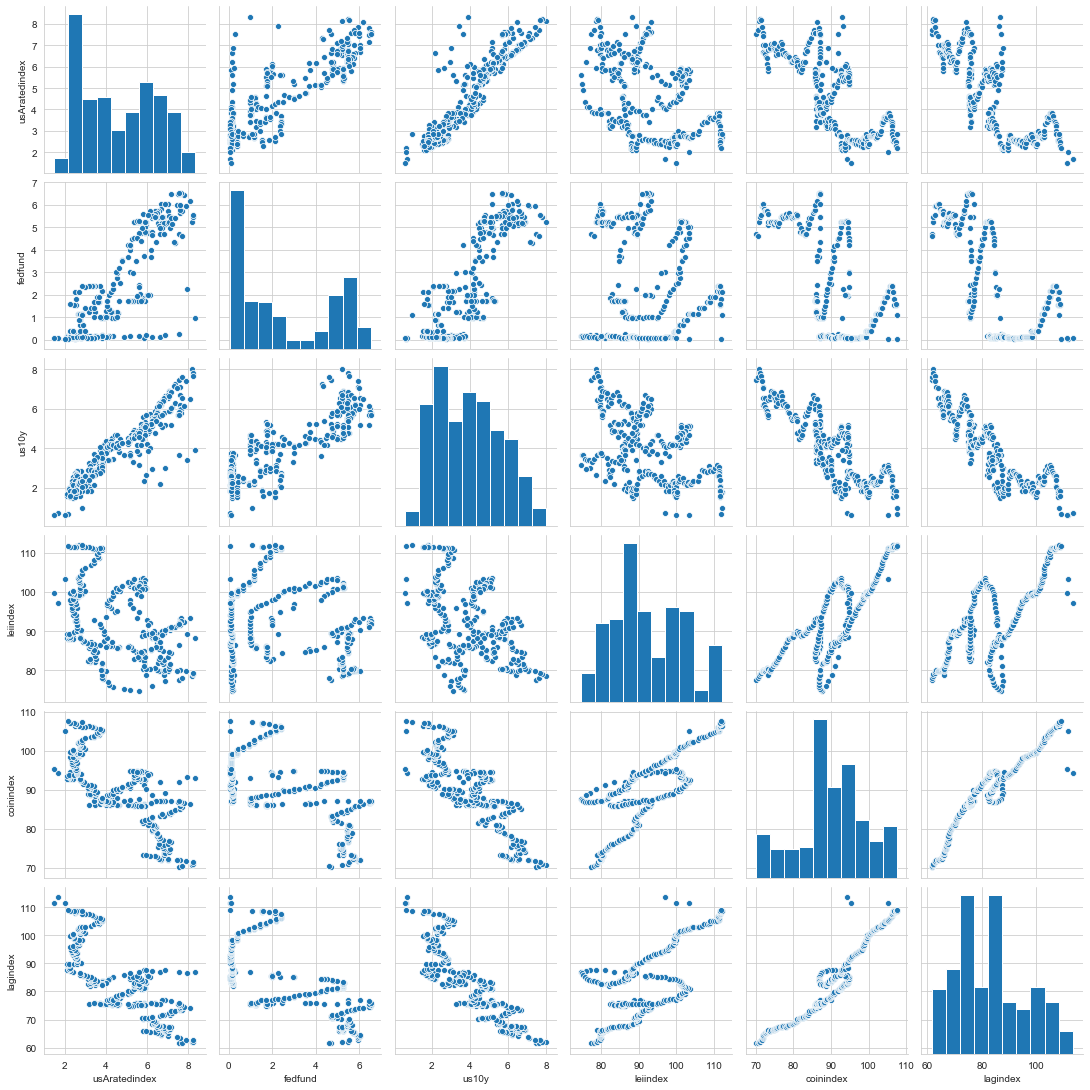

In [441]:
sns.pairplot(df);

## Multivariate Linear Regression

In [442]:
df1 = np.log(df)



For the OLS, I used the log of the dependent and independent variables, where Y is the yield on the US IG Corp Bond A Yield Index, and Xs are the features mentioned above. 


The Adj. R-squared is promising; however, the Durbin-Watson, and the Jarque-Bera, skew, and kurtosis metrics are raising concerns of autocorrelation and that the distribution is not normal, respectively. 


In [443]:
df_reg = smf.ols('usAratedindex ~ fedfund + us10y + leiindex + coinindex + lagindex', data=df1).fit()  
df_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          usAratedindex   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     449.4
Date:                Sun, 19 Jul 2020   Prob (F-statistic):          2.41e-138
Time:                        20:14:22   Log-Likelihood:                 168.83
No. Observations:                 311   AIC:                            -325.7
Df Residuals:                     305   BIC:                            -303.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9864      0.644      6.186      0.000       2.718       5.254
fedfund        0.1429      0.012     12.037      0.000       0.120       0.166
us10y          0.4306      0.046      9.450      0.000       0.341       0.520
leiindex      -1.9448      0.213     -9.144      0.000      -2.363      -1.526
coinindex      1.4495      0.368      3.934      0.000       0.724       2.175
lagindex      -0.1846      0.243     -0.760      0.448      -0.663       0.293
==============================================================================
Omnibus:                      126.335   Durbin-Watson:                   0.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.374
Skew:                           1.668   Prob(JB):                    1.55e-126
Kurtosis:                       8.795   Cond. No.                         655.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

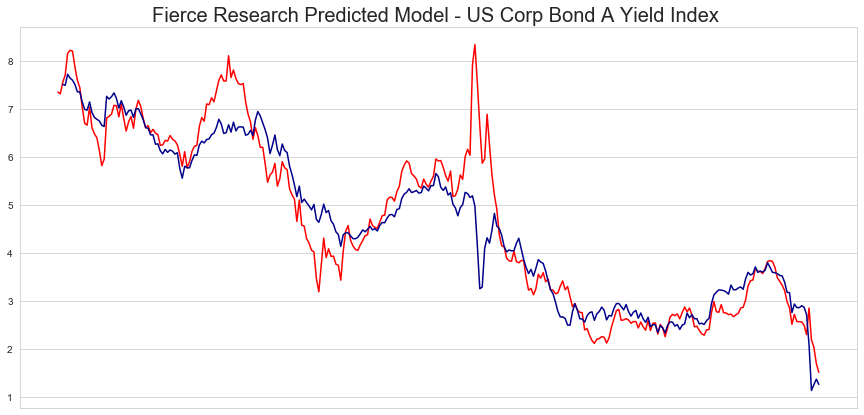

In [444]:
fig = plt.figure(figsize=(15,7))

plt.xticks(np.arange(1994, 2020, 1))

plt.title('Fierce Research Predicted Model - US Corp Bond A Yield Index ',size=20)

df['linear_prediction'] = df_reg.predict(df1)
plt.plot(df.index, df['usAratedindex'], color = 'red')
plt.plot(df.index, np.exp(df['linear_prediction']), color = 'darkblue');

In [445]:
df1.corr().iloc[:1,:]

,usAratedindex,fedfund,us10y,leiindex,coinindex,lagindex
usAratedindex,1.0,0.774289,0.908141,-0.417166,-0.714222,-0.790353


In summary, I am following closely the interest rate probability implied by market participants to understand when the Fed will lift its target rate. The 10-year yield is trading at 0.6% and I am looking for a break above the 50-day moving average (0.68%) to be bullish near-term and 200-day moving average (1.23%) to turn bullish long-term (bullish on yield means bearish on bonds). Finally, the leading and coincident indicators fell off a cliff in 2020 and should rebound sharply in 2021. However, as explained above, even though there is a pick in economic activity in H2 2020 and throughout 2021, interest rates may stay low for some time until the bond market forces the hand of the Fed to raise its target rate.  

Good luck with the market!
Guillaume, Fierce Research 